In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape


(847, 2)

In [ ]:
#eda

In [6]:
print(f"Date range of gold prices available from -{df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from -1950-01 to 2020-07


In [7]:
date = pd.date_range (start = '1/1/1950' , end = '8/1/2020' , freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [8]:
df['month'] = date
df.drop('Date' , axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


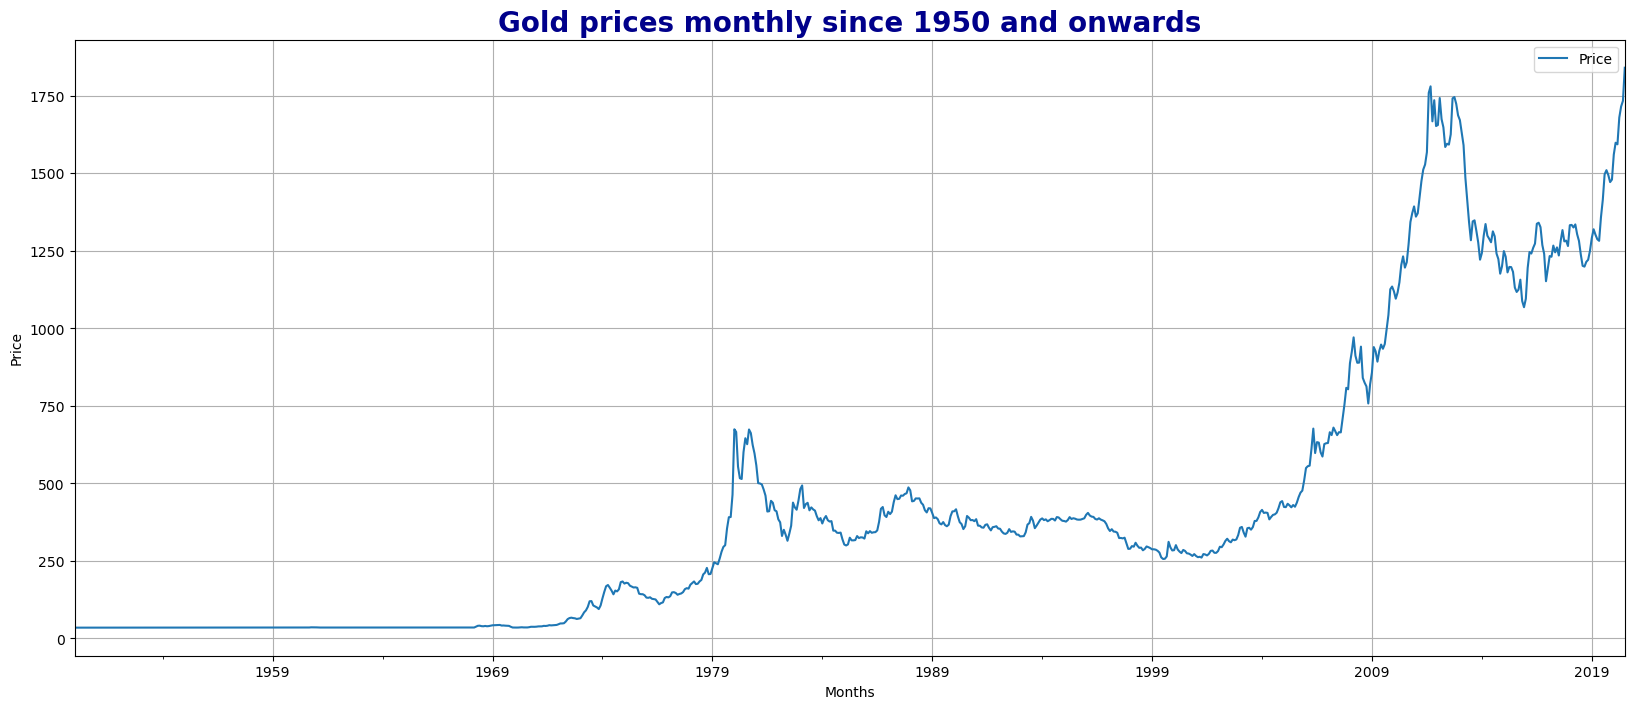

In [17]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards", fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid()

In [18]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


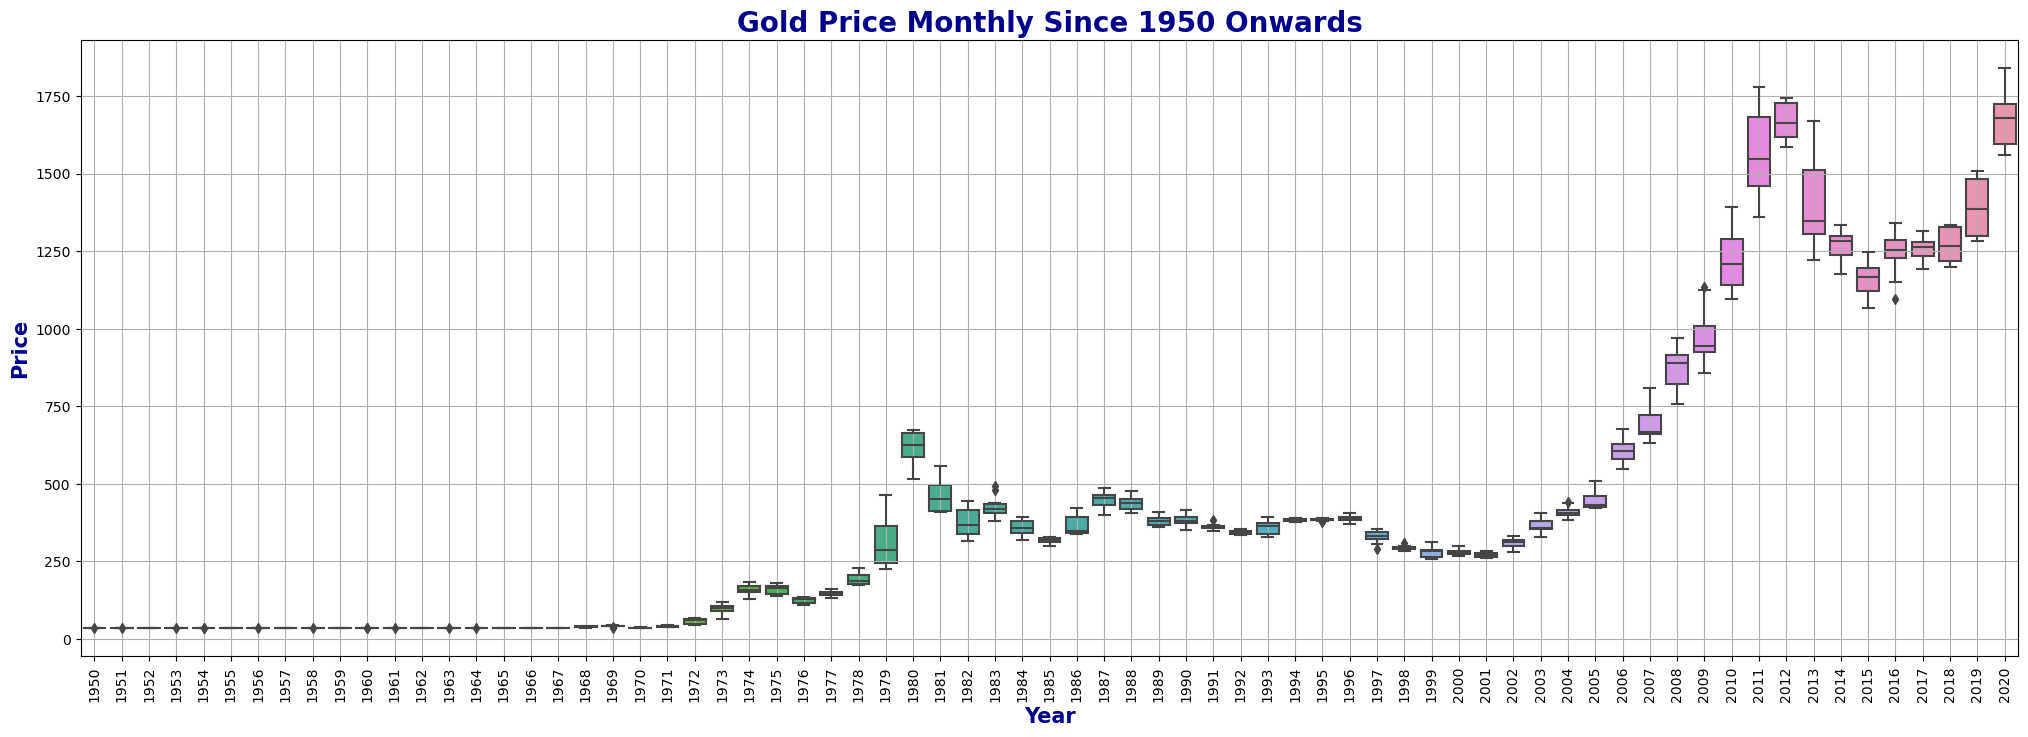

In [23]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year , y = df.values[:,0], ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Year', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.xticks(rotation = 90)
plt.grid()

Text(0, 0.5, 'Price')

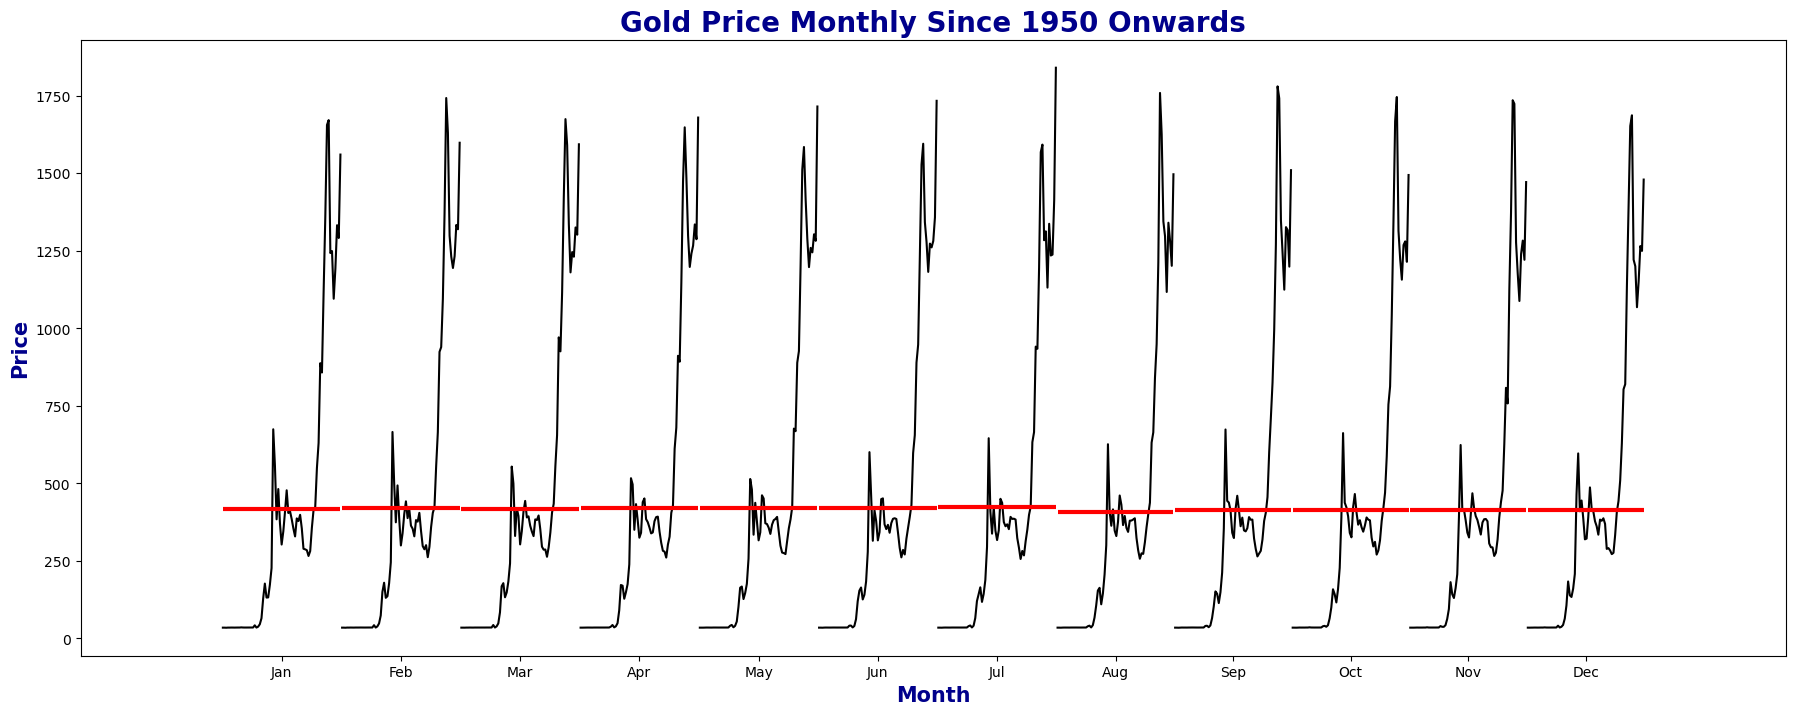

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax =plt.subplots(figsize=(22,8))
month_plot(df, ylabel =' Gold price' , ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Month', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')

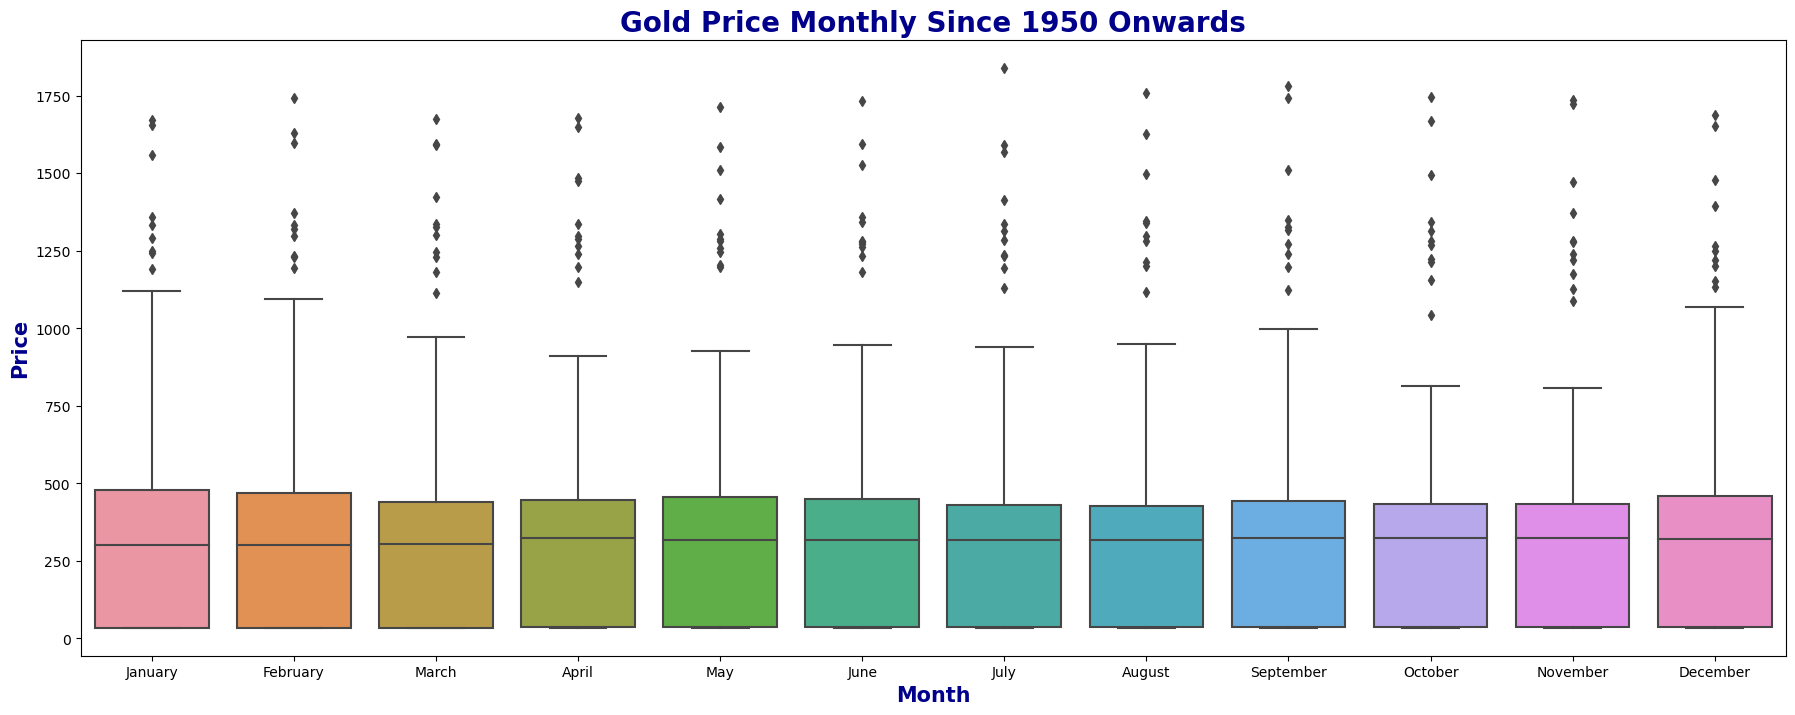

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),  y = df.values[:, 0], ax = ax)
plt.title('Gold Price Monthly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Month', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.show()

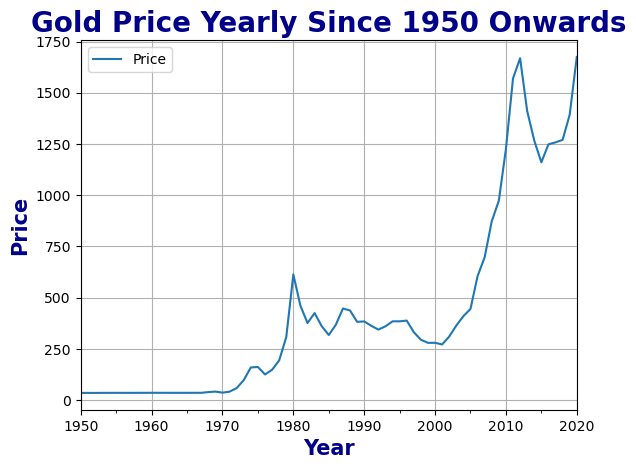

In [26]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Gold Price Yearly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Year', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.grid()

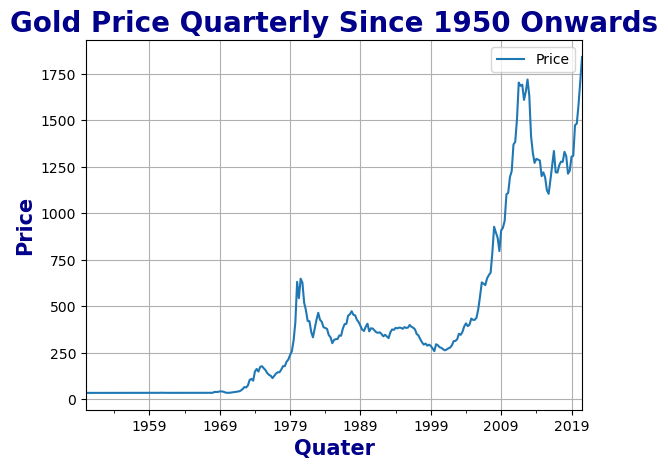

In [28]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title('Gold Price Quarterly Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Quater', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.grid()

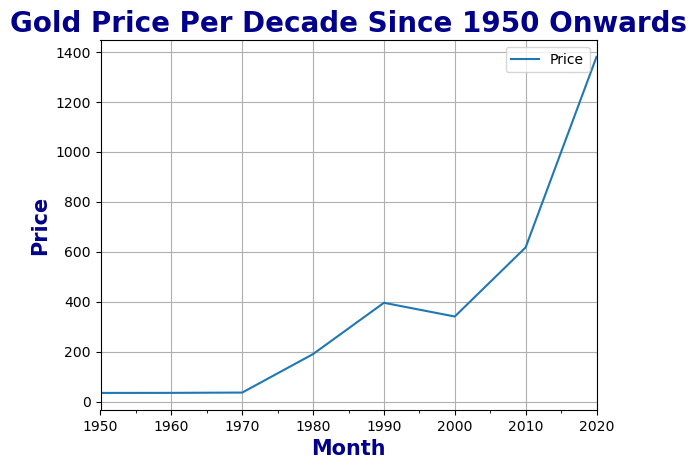

In [29]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Gold Price Per Decade Since 1950 Onwards', fontsize=20, color='darkblue',fontweight='bold')
plt.xlabel('Month', fontsize=15, color='darkblue',fontweight='bold')
plt.ylabel('Price', fontsize=15, color='darkblue',fontweight='bold')
plt.grid()

In [36]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}), left_index = True , right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


In [ ]:
fig, ax = plt.subplots(figsize = (15,10))\
df_1['Cov_pct'].plot()
plt.title